In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import random

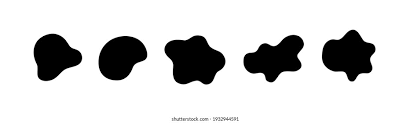

In [2]:
grayscale_img1 = cv.imread("Picture1.png", cv.IMREAD_GRAYSCALE)
cv2_imshow(grayscale_img1)

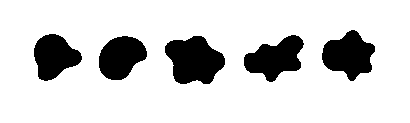

In [3]:
thresh = cv.threshold(grayscale_img1, 70, 255, cv.THRESH_BINARY)[1]

cv2_imshow(thresh)

In [4]:
number_of_white_pix = np.sum(thresh == 255)
number_of_black_pix = np.sum(thresh == 0)
  
print('Number of white pixels:', number_of_white_pix)
print('Number of black pixels:', number_of_black_pix)

height = np.size(thresh, 0)
width = np.size(thresh, 1)
print("Width:", width)
print("Height:", height)
print("Total pixels:", width*height)

Number of white pixels: 41996
Number of black pixels: 8434
Width: 410
Height: 123
Total pixels: 50430


In [5]:
num_objects = 0
for j in range(0, thresh.shape[1]-1):
  if thresh[thresh.shape[0]//2, j]==0 and thresh[thresh.shape[0]//2, j+1]==255:
    num_objects+=1
print("Number of objects:", num_objects)

Number of objects: 5


In [6]:
area = [0]

counter= 0
while(counter<thresh.shape[1]):
  newObj= True
  for i in range(1, thresh.shape[0]):
    if(thresh[i][counter]==0):
      area[-1]+=1
      newObj= False
  counter+=1
  if newObj== True and area[-1]!=0:
    area.append(0)

if area[-1]==0:
  area= area[:len(area)-1]

area

[1487, 1513, 2047, 1669, 1718]

In [7]:
sum(area)

8434

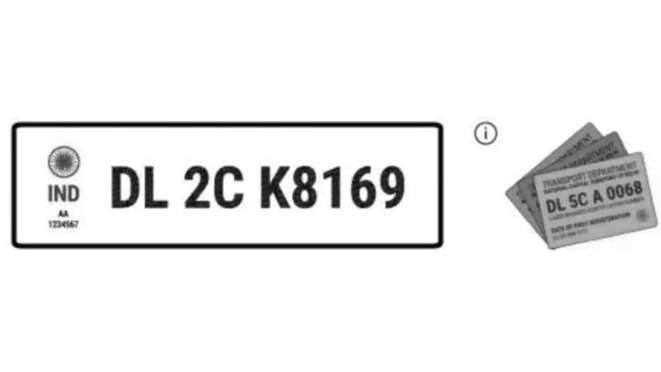

In [8]:
grayscale_img2 = cv.imread("Picture2.png", cv.IMREAD_GRAYSCALE)
cv2_imshow(grayscale_img2)

In [9]:
grayscale_img2.shape

(372, 661)

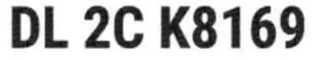

In [10]:
cropped_image = grayscale_img2[160:220, 100:420]
cv2_imshow(cropped_image)

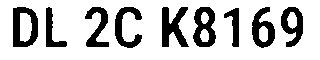

In [11]:
thresh = cv.threshold(cropped_image, 70, 255, cv.THRESH_BINARY)[1]

cv2_imshow(thresh)

In [59]:
thresh.shape

(60, 320)

In [52]:
area = [0]
h1 = [0]
h2 = [1000]
w1 = [0]
w2 = [1000]

counter= 0
while(counter<thresh.shape[1]):
  newObj=True
  for i in range(1, thresh.shape[0]):
    if(thresh[i][counter]==0):
      h1[-1] = max(i, h1[-1])
      h2[-1] = min(i, h2[-1])
      w1[-1] = max(counter, w1[-1])
      w2[-1] = min(counter, w2[-1])
      area[-1]+=1
      newObj=False
  counter+=1
  if newObj==True and area[-1]!=0:
    area.append(0)
    h1.append(0)
    h2.append(1000)
    w1.append(0)
    w2.append(1000)

if area[-1]==0:
  area= area[:len(area)-1]
  h1 = h1[:len(h1)-1]
  h2 = h2[:len(h2)-1]
  w1 = w1[:len(w1)-1]
  w2 = w2[:len(w2)-1]

print("Number of objects: ", len(area))

Number of objects:  9


In [53]:
for idx, i in enumerate(area):
  print(f"Area of blob {idx+1}: {i}")

Area of blob 1: 607
Area of blob 2: 328
Area of blob 3: 457
Area of blob 4: 499
Area of blob 5: 619
Area of blob 6: 568
Area of blob 7: 288
Area of blob 8: 505
Area of blob 9: 484


In [54]:
for i in range(len(h1)):
  print(f"Height of blob {i+1}: {h1[i]-h2[i]}")

Height of blob 1: 39
Height of blob 2: 39
Height of blob 3: 39
Height of blob 4: 40
Height of blob 5: 39
Height of blob 6: 39
Height of blob 7: 38
Height of blob 8: 40
Height of blob 9: 39


In [55]:
for i in range(len(h1)):
  print(f"Width of blob {i+1}: {w1[i]-w2[i]}")

Width of blob 1: 24
Width of blob 2: 20
Width of blob 3: 23
Width of blob 4: 26
Width of blob 5: 26
Width of blob 6: 22
Width of blob 7: 14
Width of blob 8: 22
Width of blob 9: 21


In [69]:
area = [0]
vertical_chars = []

counter= 0
while(counter<thresh.shape[1]):
  max_vertical = 0
  newObj=True
  for i in range(1, thresh.shape[0]):
    if(thresh[i][counter]==0):
      max_vertical+=1
      area[-1]+=1
      newObj=False
  if(max_vertical>39):
    vertical_chars.append(len(area))
  counter+=1
  if newObj==True and area[-1]!=0:
    area.append(0)
    
if area[-1]==0:
  area= area[:len(area)-1]
  
vertical_chars = set(vertical_chars)
print("Serial No. of vertical chars are:", vertical_chars)

Serial No. of vertical chars are: {1, 2, 5, 6}
